In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = (15,5)


We saw earlier that pandas is really good at dealing with dates. It is also amazing with strings! We're going to go back to our weather data from Chapter 5, here.

In [3]:
weather_2012 = pd.read_csv('./data/weather_2012.csv', parse_dates=True, index_col ='Date/Time')
weather_2012.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# 6.1 String operations

You'll see that the 'Weather' column has a text description of the weather that was going on each hour. We'll assume it's snowing if the text description contains "Snow".

pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great [examples](http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods) in the documentation.

In [4]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

This gives us a binary vector, which is a bit hard to look at, so we'll plot it.

In [5]:
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

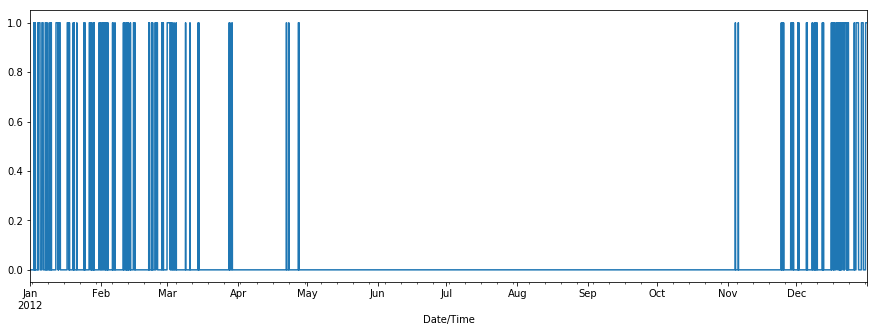

In [9]:
is_snowing.astype(int).plot()

# 6.2 Use resampling to find the snowiest month

If we wanted the median temperature each month, we could use the `resample()` method like this:

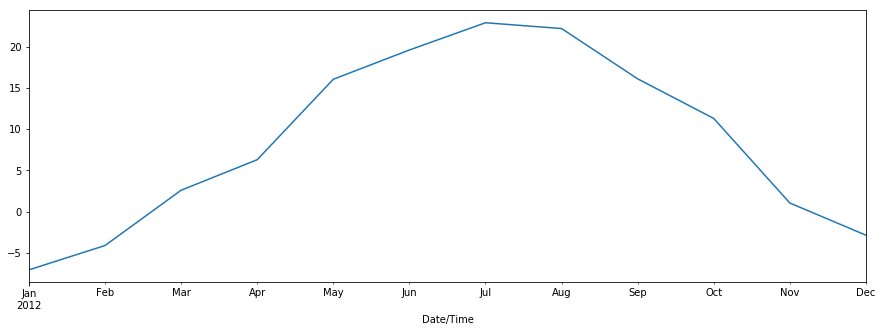

In [11]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot()

Unsurprisingly, July and August are the warmest.

So we can think of snowiness as being a bunch of 1s and 0s instead of `True`s and `False`s:

In [12]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

and then use `resample` to find the percentage of time it was snowing each month

In [15]:
is_snowing.astype(float).resample('W').apply(np.mean)

Date/Time
2012-01-01    0.000000
2012-01-08    0.351190
2012-01-15    0.291667
2012-01-22    0.172619
2012-01-29    0.136905
2012-02-05    0.291667
2012-02-12    0.130952
2012-02-19    0.083333
2012-02-26    0.196429
2012-03-04    0.351190
2012-03-11    0.017857
2012-03-18    0.023810
2012-03-25    0.000000
2012-04-01    0.077381
2012-04-08    0.000000
2012-04-15    0.000000
2012-04-22    0.017857
2012-04-29    0.047619
2012-05-06    0.000000
2012-05-13    0.000000
2012-05-20    0.000000
2012-05-27    0.000000
2012-06-03    0.000000
2012-06-10    0.000000
2012-06-17    0.000000
2012-06-24    0.000000
2012-07-01    0.000000
2012-07-08    0.000000
2012-07-15    0.000000
2012-07-22    0.000000
2012-07-29    0.000000
2012-08-05    0.000000
2012-08-12    0.000000
2012-08-19    0.000000
2012-08-26    0.000000
2012-09-02    0.000000
2012-09-09    0.000000
2012-09-16    0.000000
2012-09-23    0.000000
2012-09-30    0.000000
2012-10-07    0.000000
2012-10-14    0.000000
2012-10-21    0.000000
2

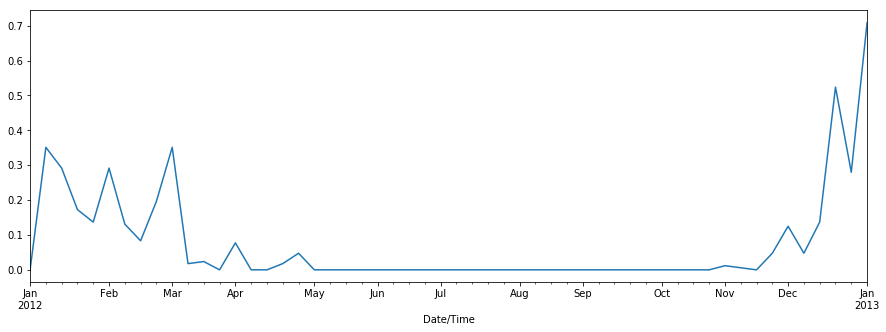

In [16]:
is_snowing.astype(float).resample('W').apply(np.mean).plot()

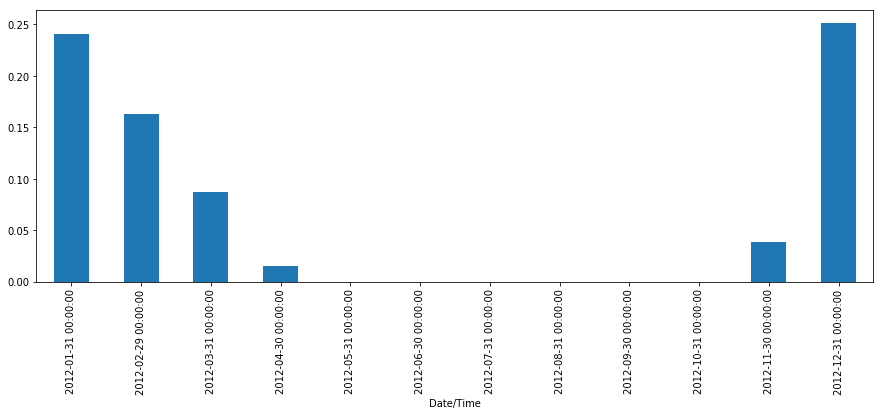

In [17]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar')

So now we know! In 2012, December was the snowiest month. Also, this graph suggests something that I feel -- it starts snowing pretty abruptly in November, and then tapers off slowly and takes a long time to stop, with the last snow usually being in April or May.


# 6.3 Plotting temperature and snowiness stats together


We can also combine these two statistics (temperature, and snowiness) into one dataframe and plot them together:

In [19]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

#name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

We'll use `concat` again to combine the two statistics into a single dataframe.

In [20]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


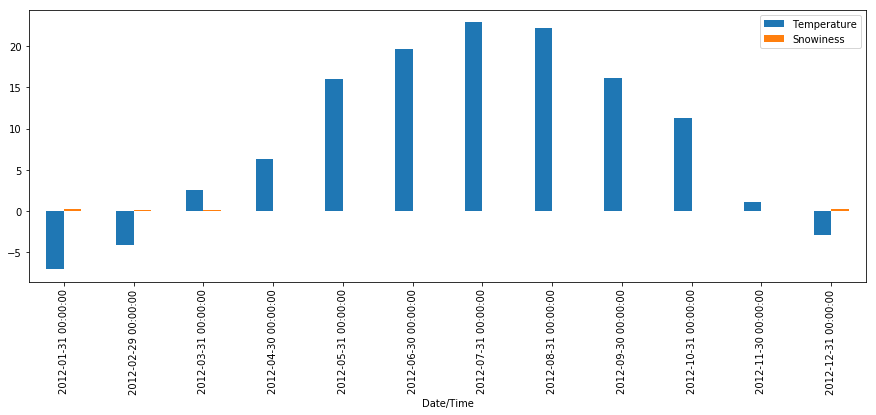

In [22]:
stats.plot(kind='bar')

Uh, that didn't work so well because the scale was wrong. We can do better by plotting them on two separate graphs:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11db2ebe0>,
      dtype=object)

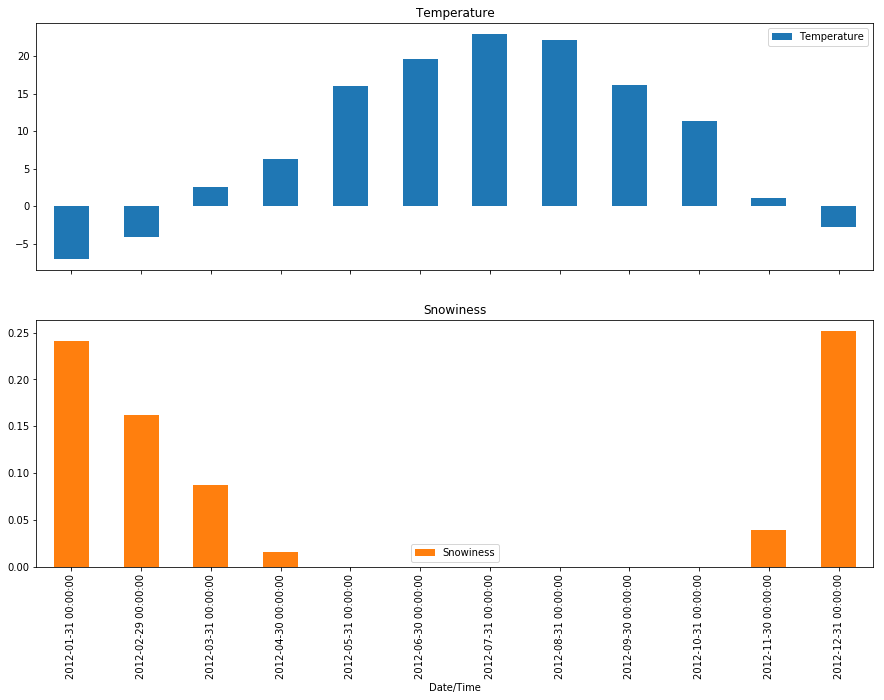

In [23]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))